# Introduction

# Data loading

In [ ]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff("EEG Eye State.arff")
df = pd.DataFrame(data)

df.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [ ]:
df.dtypes



,0
AF3,float64
F7,float64
F3,float64
FC5,float64
T7,float64
P7,float64
O1,float64
O2,float64
P8,float64
T8,float64


In [ ]:
df["eyeDetection"] = df["eyeDetection"].astype(int)


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


Checking class balance:

In [ ]:
df["eyeDetection"].value_counts(normalize=True)


,proportion
eyeDetection,
0,0.551202
1,0.448798


The dataset was approximately balanced across classes.

Defining the features and target:

In [ ]:
X = df.drop("eyeDetection", axis=1)
y = df["eyeDetection"]


# Train–test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=13,
    stratify=y
)


# Linear model (Logistic Regression)

Creating baseline model:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


Evaluating:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1651
           1       0.62      0.48      0.54      1345

    accuracy                           0.63      2996
   macro avg       0.63      0.62      0.62      2996
weighted avg       0.63      0.63      0.63      2996



The linear classifier achieved an accuracy of 63%. Performance differed across classes: recall for class 0 was 76%, whereas recall for class 1 was only 48%, indicating that the model failed to identify a substantial proportion of true class-1 observations.

These results indicate that a simple linear model is likely insufficient to capture the structure of EEG features, which are noisy and often non-linear.

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=13
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1651
           1       0.94      0.88      0.91      1345

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



The Random Forest model achieved an overall accuracy of 92%.

Recall was high for both classes (95 and 88%), indicating that the model rarely misses true states.

Compared to the linear model, the Random Forest substantially improved predictive accuracy, suggesting that non-linear relationships among EEG features are important for distinguishing eye state.

**Performance when temporally adjacent EEG samples are split randomly**

**The model is not truly 92% accurate in a robust sense.**

**The dataset structure is influencing results.**

# Confusion matrix

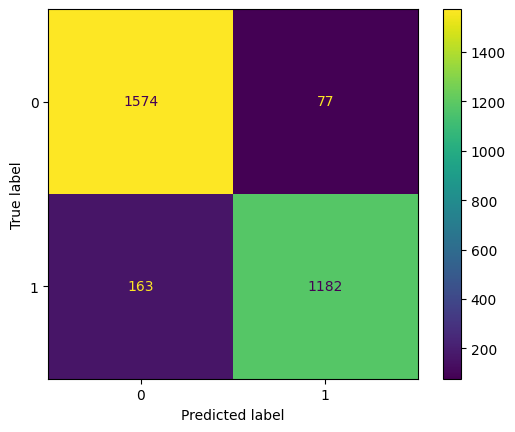

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf
)


Few false negatives and few false positives! Great!

# Feature importance

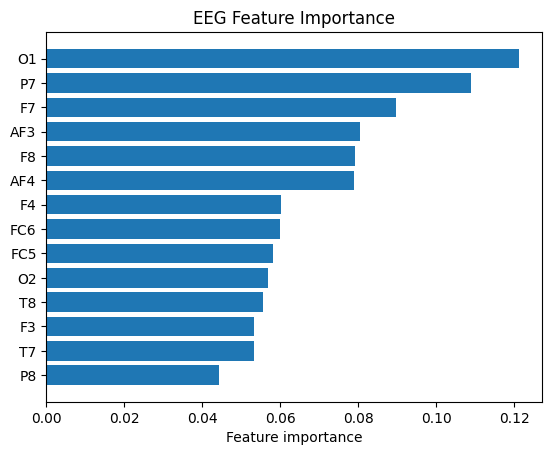

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature importance")
plt.title("EEG Feature Importance")
plt.show()


Some electrodes contribute more to the model, particularly O1 and P7.

This means there are spatial differences in EEG signals that are influencing the data.

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring="accuracy"
)

cv_scores.mean(), cv_scores.std()

(np.float64(0.4937917222963952), np.float64(0.07509719620424045))

In [ ]:
print(cv_scores)


[0.56308411 0.57510013 0.38818425 0.42323097 0.51935915]


This shows only 49% accuracy. Something is wrong.

# Finding leakage

In [21]:
print(X.shape)
print(np.bincount(y))
print(cv_scores)

(14980, 14)
[8257 6723]
[0.57042724 0.56675567 0.37850467 0.41655541 0.52336449]


In [23]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

cross_val_score(rf, X, y, cv=cv)

array([0.93324433, 0.92556742, 0.9305741 , 0.93190921, 0.92656876])

Performance went back near 90%, which indicates the issue is time structure in the data.

This is likely due to the nature of EEG data. EEG signals change slowly over time, meaning very similar neighbouring EEG samples were split between train and test when shuffling the data.

This is **temporal leakage**, which caused the model to know future information via the training data, leading to overly optimistic performance metrics during validation.

With the cross-validation without shuffle, the model performed with 50% accuracy, near chance level, which is more realistic.

# Correcting to avoid temporal leakage

After defining X and y

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ("model", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

In [26]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=tscv,
    scoring="accuracy"
)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Std:", scores.std())

Scores: [0.60376603 0.515625   0.57371795 0.46714744 0.50320513]
Mean: 0.5326923076923077
Std: 0.049379132372284334


In [37]:
from sklearn.metrics import classification_report
import numpy as np

y_true_all = []
y_pred_all = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53      7066
           1       0.47      0.61      0.53      5414

    accuracy                           0.53     12480
   macro avg       0.54      0.54      0.53     12480
weighted avg       0.55      0.53      0.53     12480



Using time-aware cross-validation, the Random Forest model got 53% overall accuracy, with similar scores for both classes.

Precision and recall were also symmetric across classes, indicating that the model does not strongly favour either eye state, but performs only slightly above chance level.

This result suggests that the high accuracy obtained earlier with a random train-test split was due to temporal leakage. When evaluated across time blocks, the model does not generalise well, indicating that the current features do not capture stable signals distinguishing eye state across time.

This shows that EEG data is noisy and hard to model, and that better features or different models might be needed to improve performance.

# Conclusion

This project explored the use of machine learning models to predict eye state from EEG signals using the EEG Eye State dataset. Initial results obtained with a random train-test split showed high accuracy, but further analysis with time-based cross-validation produced accuracy close to 53%, only slightly above chance level.

This difference indicates that temporally adjacent EEG samples are highly similar, which can inflate performance when the data is randomly split. When evaluated using time-aware methods, the models showed limited ability to generalise across time, highlighting the noisy and complex nature of EEG signals.

The project demonstrates the importance of appropriate validation strategies in neuroscience machine learning. Future work could include improved feature extraction, such as frequency-band features or windowed statistics, and evaluation on datasets with subject-level information to better assess generalisation.

